<a href="https://colab.research.google.com/github/handikamsf/data-wrangling/blob/main/Handling_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling A**

**Kelompok:** 7

---

**Nama (NPM):**

Saif Ali Zaky A. (24083010004)

M. Handika M. S. (24083010036)

Rizky Faza H. N. (24083010099)

Indra Maulana R. F. Y. (24083010105)

Yafi Rafsanjani H. (24083010122)


---


**Dosen Pengampu:**

Andri Fauzan Adziima, M.Si.

Kartika Maulida Hindrayani, S.Kom., M.Kom

# **Dataset Tinggi dan Berat Badan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = {
'Tinggi (cm)': [160, 165, 170, 175, 180, 185, 190, 155, 158, 162, 168, 172, 178, 182, 188, 195, 150, 152, 159, 163, 167, 171, 176, 181, 186, 192, 200, 145, 148, 153, 157, 161, 166, 169, 174, 177, 183, 187, 193, 198, 205, 140, 142, 147, 151, 156, 160, 165, 170, 175],
'Berat (kg)': [55, 60, 65, 70, 75, 80, 85, 50, 52, 58, 63, 68, 72, 78, 82, 90, 45, 47, 53, 57, 62, 67, 71, 76, 81, 88, 95, 40, 42, 48, 51, 56, 61, 66, 69, 74, 79, 84, 91, 97, 100, 38, 39, 44, 49, 54, 59, 64, 70, 75]
}
df = pd.DataFrame(data)

In [ ]:
# Menambahkan outliers
df.loc[50] = [250, 120] # Tinggi 250 cm, Berat 120 kg
df.loc[51] = [130, 30] # Tinggi 130 cm, Berat 30 kg
df.loc[52] = [210, 110] # Tinggi 210 cm, Berat 110 kg
df.loc[53] = [135, 25] # Tinggi 135 cm, Berat 25 kg

In [ ]:
df

,Tinggi (cm),Berat (kg)
0,160,55
1,165,60
2,170,65
3,175,70
4,180,75
5,185,80
6,190,85
7,155,50
8,158,52
9,162,58


In [ ]:
df.loc[50] = [250, 120]
df.loc[51] = [130, 30]
df.loc[52] = [210, 110]
df.loc[53] = [135, 25]

In [ ]:
outlier_values = [
    (100, 500, 300),
    (101, 600, 450),
    (102, 700, 550),
    (103, 800, 700),
    (104, 900, 850)
]

for idx, a, b in outlier_values:
    df.loc[idx] = [a, b]  # Menambahkan outlier dengan indeks tertentu

print(df)

     Tinggi (cm)  Berat (kg)
0            160          55
1            165          60
2            170          65
3            175          70
4            180          75
5            185          80
6            190          85
7            155          50
8            158          52
9            162          58
10           168          63
11           172          68
12           178          72
13           182          78
14           188          82
15           195          90
16           150          45
17           152          47
18           159          53
19           163          57
20           167          62
21           171          67
22           176          71
23           181          76
24           186          81
25           192          88
26           200          95
27           145          40
28           148          42
29           153          48
30           157          51
31           161          56
32           166          61
33           1

#Deteksi Outliers dengan Z-Score

In [ ]:
z_scores = np.abs(stats.zscore(df['Berat (kg)']))
outliers = df[(z_scores > 3)]
print(outliers)

     Tinggi (cm)  Berat (kg)
103          800         700
104          900         850


#Deteksi Outliers dengan IQR

In [ ]:
Q1 = df['Berat (kg)'].quantile(0.25)
Q3 = df['Berat (kg)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Berat (kg)'] < (Q1 - 1.5 * IQR)) | (df['Berat (kg)'] > (Q3 + 1.5 * IQR))]
print(outliers)

     Tinggi (cm)  Berat (kg)
100          500         300
101          600         450
102          700         550
103          800         700
104          900         850


#Visualisasi dengan Boxplot

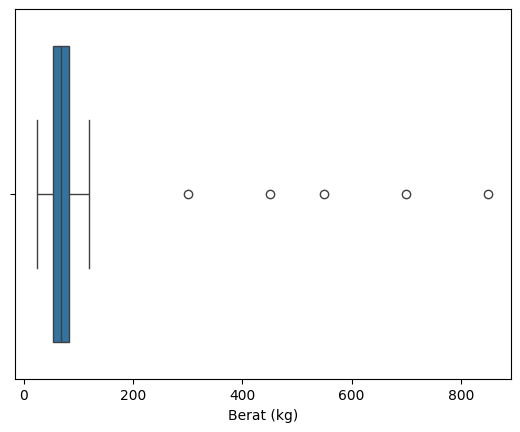

In [ ]:
sns.boxplot(x=df['Berat (kg)'])
plt.show()

#Visualisasi Scatter plot

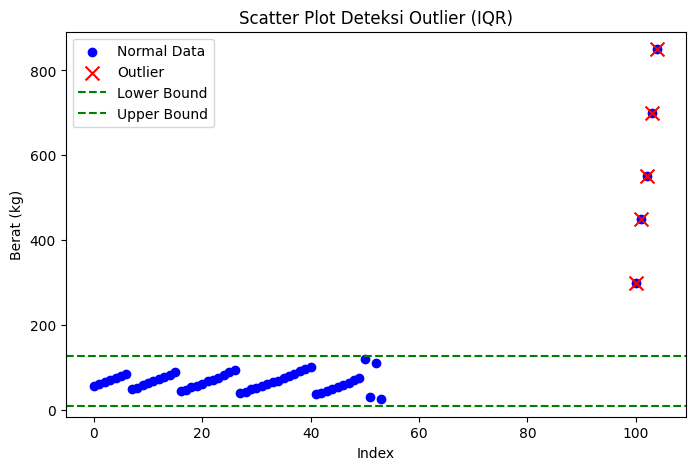

In [ ]:
# Menghitung IQR untuk deteksi outlier
Q1 = df['Berat (kg)'].quantile(0.25)
Q3 = df['Berat (kg)'].quantile(0.75)
IQR = Q3 - Q1

# Batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
df['Outlier'] = (df['Berat (kg)'] < lower_bound) | (df['Berat (kg)'] > upper_bound)

# Plot Scatter
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['Berat (kg)'], color='blue', label='Normal Data')
plt.scatter(df[df['Outlier']].index, df[df['Outlier']]['Berat (kg)'], color='red', label='Outlier', marker='x', s=100)
plt.axhline(y=lower_bound, color='green', linestyle='dashed', label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='dashed', label='Upper Bound')

plt.xlabel("Index")
plt.ylabel("Berat (kg)")
plt.title("Scatter Plot Deteksi Outlier (IQR)")
plt.legend()
plt.show()

#Menggunakan Median Absolute Deviation (MAD)

In [ ]:
from sklearn.cluster import DBSCAN

X = df[['Berat (kg)']].values  # Ubah ke array
dbscan = DBSCAN(eps=30, min_samples=2)  # eps menentukan jarak tetangga
labels = dbscan.fit_predict(X)

df['Cluster'] = labels  # Label -1 adalah outlier
outliers = df[df['Cluster'] == -1]

print(outliers)

Empty DataFrame
Columns: [Tinggi (cm), Berat (kg), Outlier, Cluster]
Index: []


#Isolation Forest

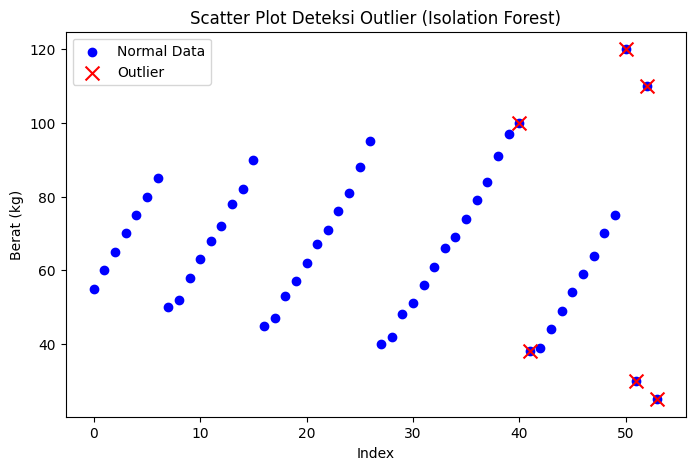

    Tinggi (cm)  Berat (kg)  Outlier  Cluster
40          205         100     True        0
41          140          38     True        0
50          250         120     True        0
51          130          30     True        0
52          210         110     True        0
53          135          25     True        0


In [ ]:
from sklearn.ensemble import IsolationForest

# Konversi ke array
X = df[['Berat (kg)']]

# Inisialisasi Model Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df['Outlier'] = iso_forest.fit_predict(X)

# Outlier ditandai dengan -1
df['Outlier'] = df['Outlier'] == -1

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['Berat (kg)'], color='blue', label='Normal Data')
plt.scatter(df[df['Outlier']].index, df[df['Outlier']]['Berat (kg)'],
            color='red', marker='x', s=100, label='Outlier')

plt.xlabel("Index")
plt.ylabel("Berat (kg)")
plt.title("Scatter Plot Deteksi Outlier (Isolation Forest)")
plt.legend()
plt.show()

# Menampilkan Outlier
print(df[df['Outlier']])


#Teknik Penanganan Outliers

In [ ]:
import numpy as np

# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df["Tinggi (cm)"].quantile(0.25)
Q3 = df["Tinggi (cm)"].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataset
df_cleaned = df[(df["Tinggi (cm)"] >= lower_bound) & (df["Tinggi (cm)"] <= upper_bound)]

# Menampilkan jumlah data sebelum dan sesudah
print(f"Jumlah data sebelum menghapus outlier: {len(df)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_cleaned)}")

# Menampilkan data setelah outlier dihapus
df_cleaned.head(100)


Jumlah data sebelum menghapus outlier: 54
Jumlah data setelah menghapus outlier: 53


,Tinggi (cm),Berat (kg),Outlier,Cluster
0,160,55,False,0
1,165,60,False,0
2,170,65,False,0
3,175,70,False,0
4,180,75,False,0
5,185,80,False,0
6,190,85,False,0
7,155,50,False,0
8,158,52,False,0
9,162,58,False,0


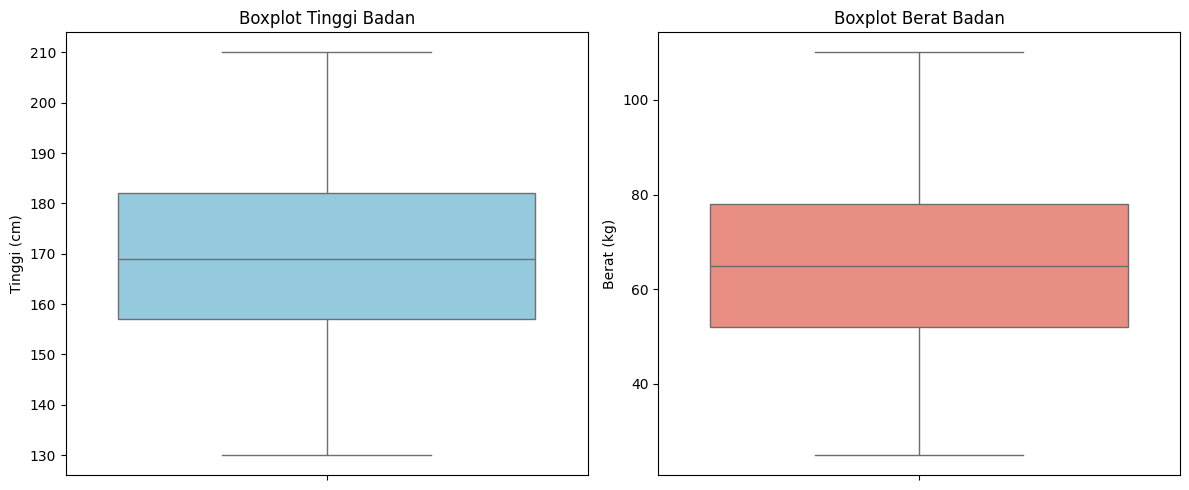

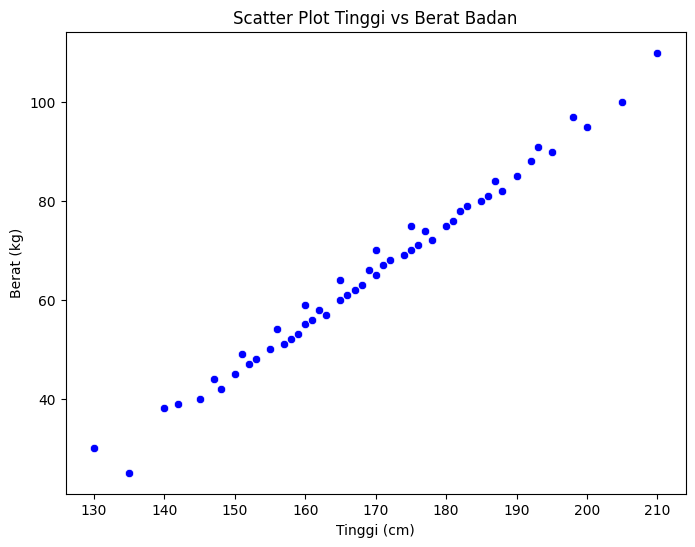

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned["Tinggi (cm)"], color="skyblue")
plt.title("Boxplot Tinggi Badan")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned["Berat (kg)"], color="salmon")
plt.title("Boxplot Berat Badan")

plt.tight_layout()
plt.show()

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Tinggi (cm)"], y=df_cleaned["Berat (kg)"], color="blue")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Scatter Plot Tinggi vs Berat Badan")

plt.show()


   Tinggi (cm)  Tinggi_Log  Tinggi_Sqrt  Tinggi_Scaled
0          160    5.081404    12.649111       0.038961
1          165    5.111988    12.845233       0.045455
2          170    5.141664    13.038405       0.051948
3          175    5.170484    13.228757       0.058442
4          180    5.198497    13.416408       0.064935


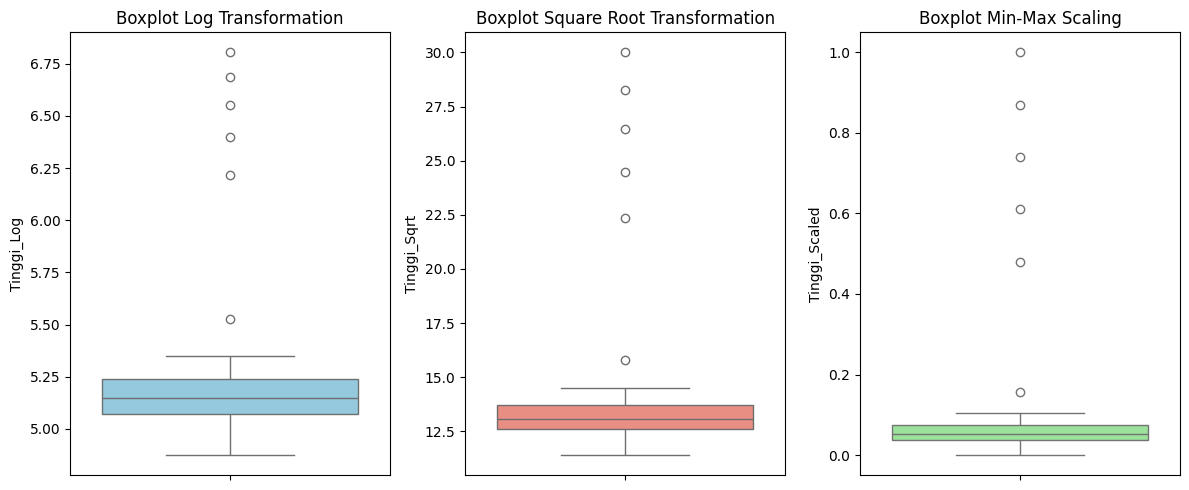

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Copy dataframe asli untuk dibandingkan setelah transformasi
df_transformed = df.copy()

# 1. Log Transformation (menangani skewed data dan mengurangi outlier)
df_transformed["Tinggi_Log"] = np.log1p(df_transformed["Tinggi (cm)"])

# 2. Square Root Transformation (alternatif jika log terlalu drastis)
df_transformed["Tinggi_Sqrt"] = np.sqrt(df_transformed["Tinggi (cm)"])

# 3. Min-Max Scaling (menormalkan data ke rentang [0,1])
scaler = MinMaxScaler()
df_transformed["Tinggi_Scaled"] = scaler.fit_transform(df_transformed[["Tinggi (cm)"]])

# Menampilkan hasil transformasi
print(df_transformed[["Tinggi (cm)", "Tinggi_Log", "Tinggi_Sqrt", "Tinggi_Scaled"]].head())

# Visualisasi hasil transformasi untuk melihat distribusi
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_transformed["Tinggi_Log"], color="skyblue")
plt.title("Boxplot Log Transformation")

plt.subplot(1, 3, 2)
sns.boxplot(y=df_transformed["Tinggi_Sqrt"], color="salmon")
plt.title("Boxplot Square Root Transformation")

plt.subplot(1, 3, 3)
sns.boxplot(y=df_transformed["Tinggi_Scaled"], color="lightgreen")
plt.title("Boxplot Min-Max Scaling")

plt.tight_layout()
plt.show()


   Tinggi (cm)  Berat (kg)  Cluster  Outlier  Tinggi (cm)_Mean  \
0          160          55        0    False             160.0   
1          165          60        0    False             165.0   
2          170          65        0    False             170.0   
3          175          70        0    False             175.0   
4          180          75        0    False             180.0   

   Tinggi (cm)_Median  Tinggi (cm)_Mode  Berat (kg)_Mean  Berat (kg)_Median  \
0               160.0               160             55.0               55.0   
1               165.0               165             60.0               60.0   
2               170.0               170             65.0               65.0   
3               175.0               175             70.0               70.0   
4               180.0               180             75.0               75.0   

   Berat (kg)_Mode  
0               55  
1               60  
2               65  
3               70  
4               75  


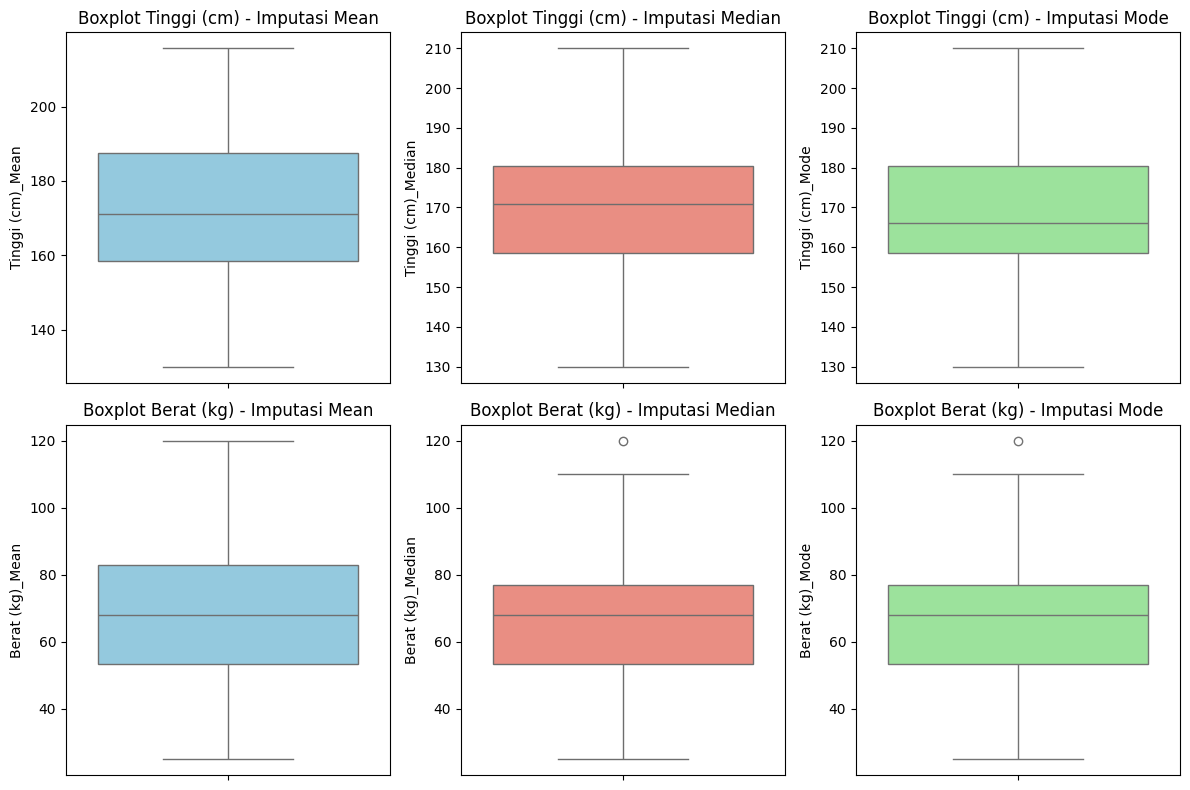

In [ ]:
import numpy as np

# Daftar kolom yang akan dibersihkan dari outlier
columns = ["Tinggi (cm)", "Berat (kg)"]

# Copy dataset asli
df_imputed = df.copy()

for col in columns:
    # Menghitung Q1, Q3, dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung Mean, Median, dan Mode
    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_value = df[col].mode()[0]  # Mengambil mode pertama

    # Mengganti outlier dengan Mean
    df_imputed[f"{col}_Mean"] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                                         mean_value, df[col])

    # Mengganti outlier dengan Median
    df_imputed[f"{col}_Median"] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                                           median_value, df[col])

    # Mengganti outlier dengan Mode
    df_imputed[f"{col}_Mode"] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                                         mode_value, df[col])

# Menampilkan hasil imputasi
print(df_imputed.head())

# Visualisasi hasil imputasi dengan Boxplot untuk kedua kolom
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns):
    plt.subplot(2, 3, i * 3 + 1)
    sns.boxplot(y=df_imputed[f"{col}_Mean"], color="skyblue")
    plt.title(f"Boxplot {col} - Imputasi Mean")

    plt.subplot(2, 3, i * 3 + 2)
    sns.boxplot(y=df_imputed[f"{col}_Median"], color="salmon")
    plt.title(f"Boxplot {col} - Imputasi Median")

    plt.subplot(2, 3, i * 3 + 3)
    sns.boxplot(y=df_imputed[f"{col}_Mode"], color="lightgreen")
    plt.title(f"Boxplot {col} - Imputasi Mode")

plt.tight_layout()
plt.show()


   Tinggi (cm)  Berat (kg)  Cluster  Outlier
0        160.0        55.0        0    False
1        165.0        60.0        0    False
2        170.0        65.0        0    False
3        175.0        70.0        0    False
4        180.0        75.0        0    False


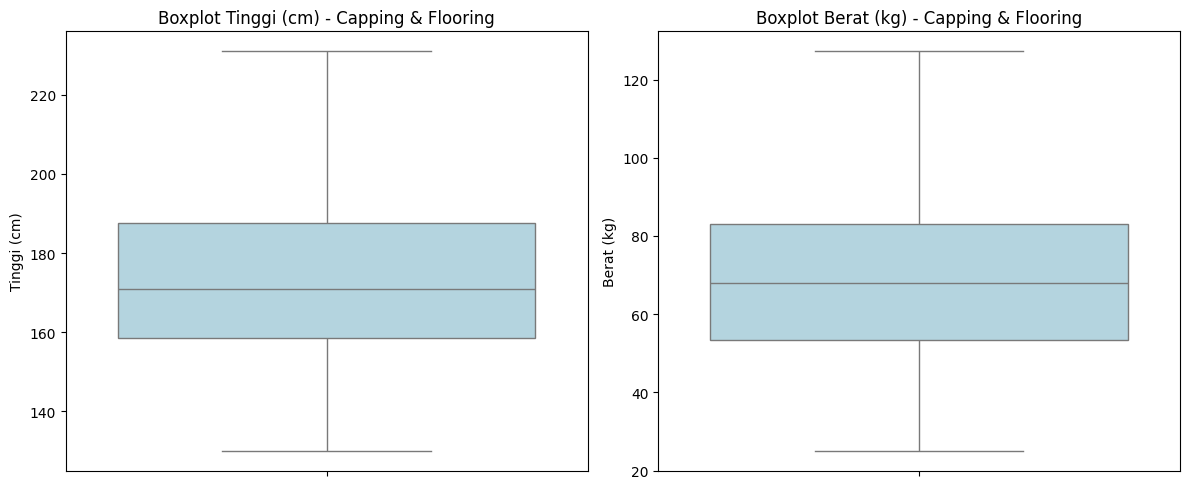

In [ ]:
import numpy as np

# Daftar kolom yang akan dibersihkan dari outlier
columns = ["Tinggi (cm)", "Berat (kg)"]

# Copy dataset asli
df_capped = df.copy()

for col in columns:
    # Menghitung Q1, Q3, dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menerapkan Capping dan Flooring
    df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df_capped[col])

# Menampilkan hasil setelah Capping dan Flooring
print(df_capped.head())

# Visualisasi hasil Capping dan Flooring dengan Boxplot
plt.figure(figsize=(12, 5))

for i, col in enumerate(columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df_capped[col], color="lightblue")
    plt.title(f"Boxplot {col} - Capping & Flooring")

plt.tight_layout()
plt.show()


<ipython-input-20-d87a03981b52>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[207.49 207.49 207.49 207.49 207.49 207.49]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_robust.loc[outliers, col] = rf_model.predict(X[outliers])
<ipython-input-20-d87a03981b52>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[115.6 115.6 115.6 115.6 115.6]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_robust.loc[outliers, col] = rf_model.predict(X[outliers])


   Tinggi (cm)  Berat (kg)  Outlier  Cluster
0        160.0        55.0    False        0
1        165.0        60.0    False        0
2        170.0        65.0    False        0
3        175.0        70.0    False        0
4        180.0        75.0    False        0


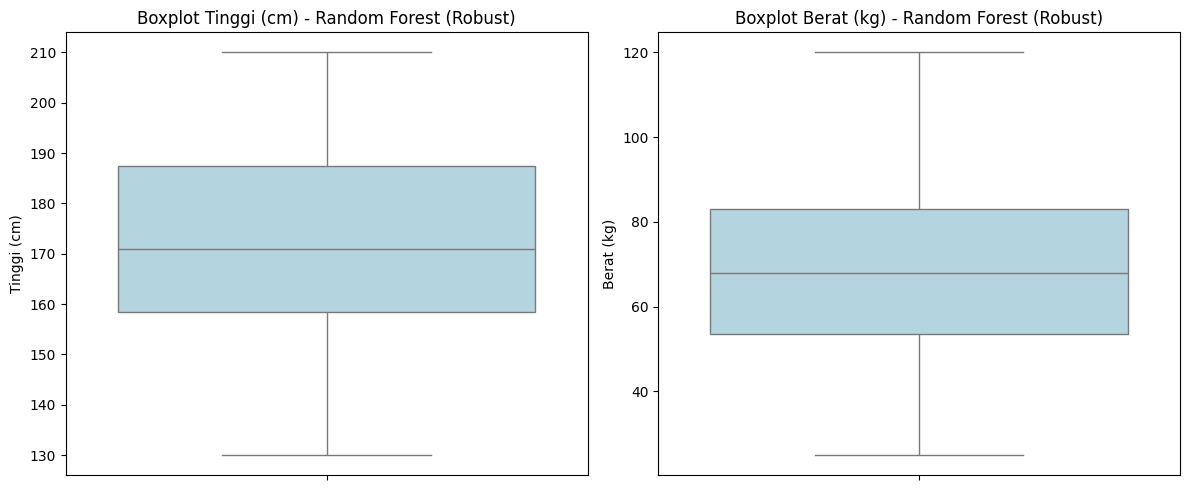

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom yang akan dibersihkan dari outlier
columns = ["Tinggi (cm)", "Berat (kg)"]

# Copy dataset asli
df_robust = df.copy()

for col in columns:
    # Menghitung Q1, Q3, dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menandai outlier
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Membuat fitur X (tanpa kolom target)
    X = df.drop(columns=[col])
    y = df[col]

    # **CEK apakah masih ada data non-outlier**
    if len(y[~outliers]) > 0:
        # Gunakan Random Forest untuk menggantikan outlier
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X[~outliers], y[~outliers])  # Train hanya dengan data non-outlier
        df_robust.loc[outliers, col] = rf_model.predict(X[outliers])
    else:
        # Jika semua data outlier, gunakan Median
        df_robust[col] = np.where(outliers, df[col].median(), df[col])

# Menampilkan hasil setelah pembersihan
print(df_robust.head())

# Visualisasi hasil dengan Boxplot
plt.figure(figsize=(12, 5))

for i, col in enumerate(columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df_robust[col], color="lightblue")
    plt.title(f"Boxplot {col} - Random Forest (Robust)")

plt.tight_layout()
plt.show()


# **Dataset Titanic**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Beri izin akses

In [ ]:
!kaggle datasets list

ref                                                                    title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000           9101        150  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          15348        268  1.0              
adilshamim8/temperature                                                Global Environmental Trends 2000-2024                   22391  2025-03-14 08:11:56.090000            946 

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0


In [ ]:
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
col_numerik = ['Survived','Pclass','Age','SibSp','Parch','Fare']
col_kontinu = ['Age','Fare']
col_diskrit = ['SibSp','Parch']
col_kategorikal = ['Survived','Pclass']

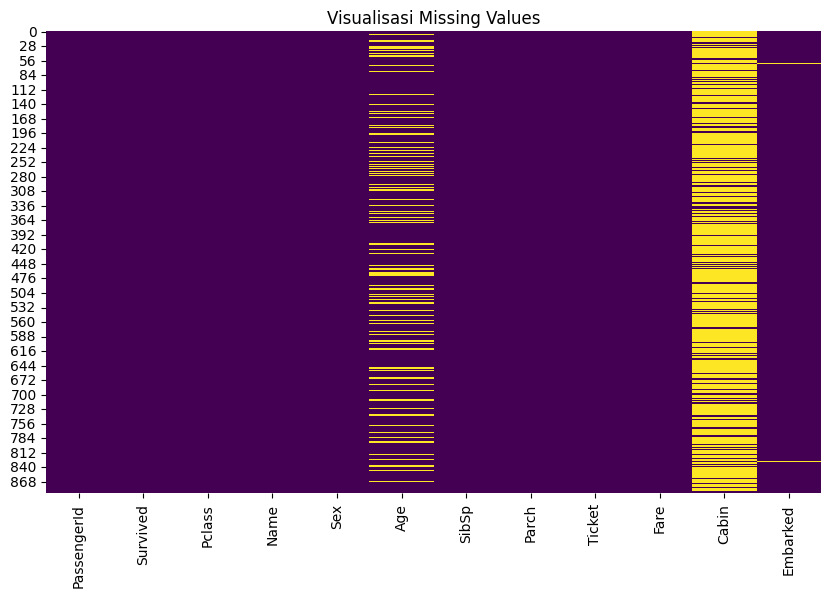

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
from scipy.stats import shapiro, normaltest
import pandas as pd

# Cek Distribusi Normal untuk Kolom Age
stat, p = shapiro(df['Age'].dropna())
print('Shapiro-Wilk Test: Statistik=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("Distribusi Normal (Imputasi Mean)")
else:
    print("Distribusi Tidak Normal (Imputasi Median)")

Shapiro-Wilk Test: Statistik=0.981, p=0.000
Distribusi Tidak Normal (Imputasi Median)


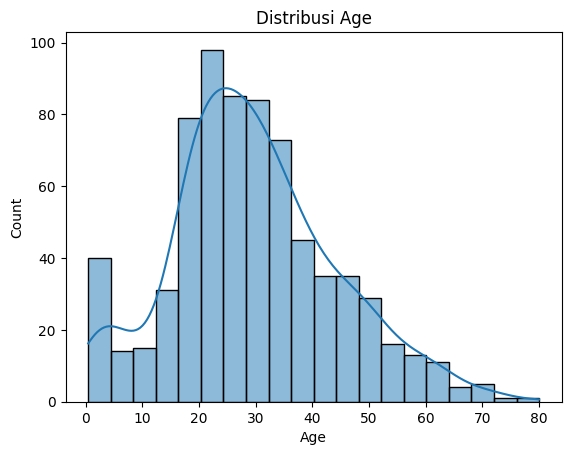

In [ ]:
# Visualisasi Distribusi Age
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Distribusi Age")
plt.show()

<ipython-input-20-2098677f85f8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


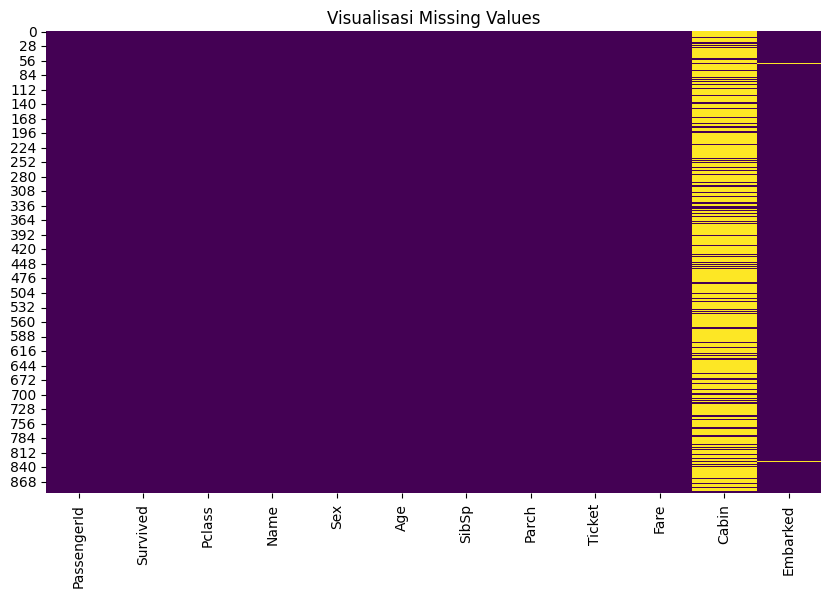

In [ ]:
# Mengisi nilai yang hilang pada kolom 'age' dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# Deteksi Outliers dengan Z-Score

In [ ]:
for col in col_kontinu:
    z_scores = np.abs(stats.zscore(df[col]))  # Hitung Z-Score
    df[f'outliers_{col}'] = (z_scores > 3).astype(int)  # 1 = Outliers, 0 = Normal

# Gabung Semua Outliers Jadi Satu Kolom
df['total_outliers'] = df[[f'outliers_{col}' for col in col_kontinu]].sum(axis=1)

# Filter Data yang Punya Outliers
outliers_final = df[df['total_outliers'] > 0]

# Tampilkan Hasil
outliers_final[['Age', 'Fare', 'outliers_Age', 'outliers_Fare',]]

,Age,Fare,outliers_Age,outliers_Fare
27,19.0,263.0000,0,1
88,23.0,263.0000,0,1
96,71.0,34.6542,1,0
116,70.5,7.7500,1,0
118,24.0,247.5208,0,1
258,35.0,512.3292,0,1
299,50.0,247.5208,0,1
311,18.0,262.3750,0,1
341,24.0,263.0000,0,1
377,27.0,211.5000,0,1


#Deteksi Outliers dengan IQR

In [ ]:
for col in col_kontinu:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

# Gabung Semua Outliers Jadi Satu Kolom
df['total_outliers'] = df[[f'outliers_{col}' for col in col_kontinu]].sum(axis=1)

# Filter Data yang Punya Outliers
outliers_final = df[df['total_outliers'] > 0]

# Tampilkan Hasil
outliers_final[['Age', 'Fare', 'outliers_Age', 'outliers_Fare',]]

,Age,Fare,outliers_Age,outliers_Fare
27,19.0,263.0000,0,1
88,23.0,263.0000,0,1
96,71.0,34.6542,1,0
116,70.5,7.7500,1,0
118,24.0,247.5208,0,1
258,35.0,512.3292,0,1
299,50.0,247.5208,0,1
311,18.0,262.3750,0,1
341,24.0,263.0000,0,1
377,27.0,211.5000,0,1


# Visualisasi dengan Boxplot

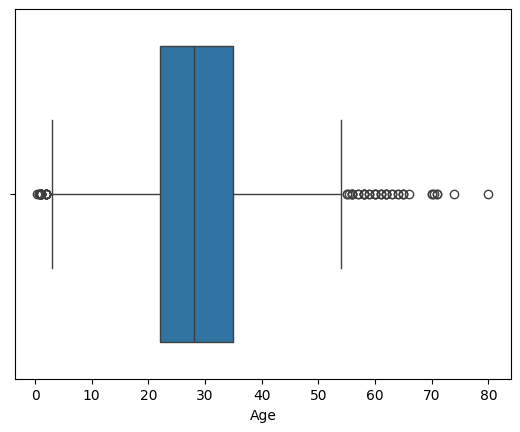

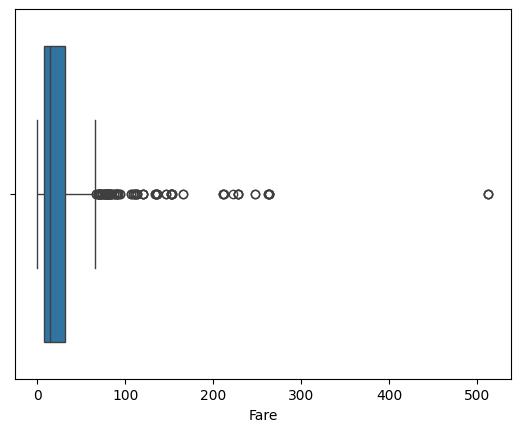

In [ ]:
for col in col_kontinu:
  sns.boxplot(x=df[col])
  plt.show()

# Visualisasi dengan Scatter Plot

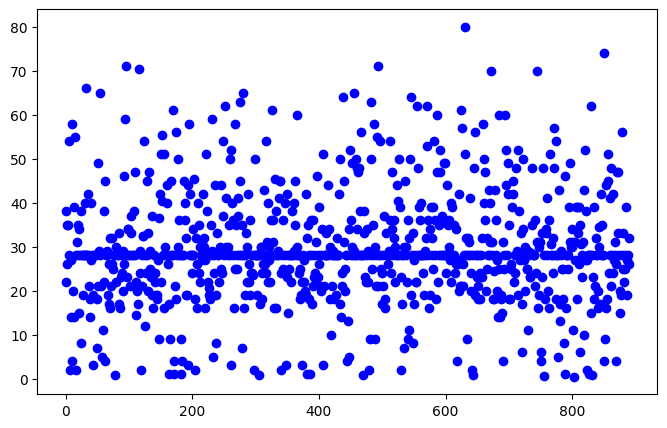

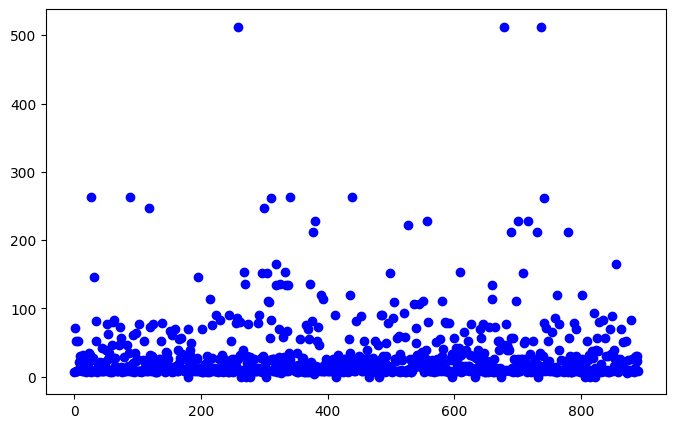

In [ ]:
for col in col_kontinu:
  plt.figure(figsize=(8, 5))
  plt.scatter(df.index, df[col], color='blue', label='Normal Data')

# Deteksi Outliers dengan DBSCAN

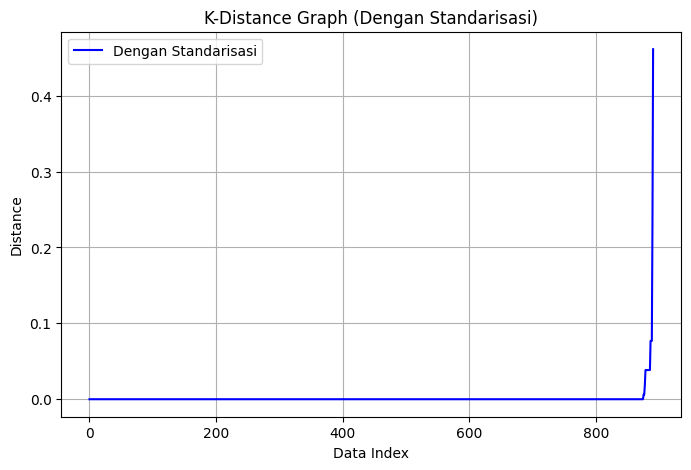

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

k = 2  # Karena min_samples = 2
nbrs = NearestNeighbors(n_neighbors=k)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age']])

nbrs.fit(df_scaled)
distances_scaled, _ = nbrs.kneighbors(df_scaled)

distances_scaled = np.sort(distances_scaled[:, 1])
plt.figure(figsize=(8, 5))
plt.plot(distances_scaled, color='blue', label='Dengan Standarisasi')
plt.title("K-Distance Graph (Dengan Standarisasi)")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

X = df[['Age']].values  # Ubah ke array
dbscan = DBSCAN(eps=1, min_samples=2)  # eps menentukan jarak tetangga
labels = dbscan.fit_predict(X)

df['Cluster'] = labels  # Label -1 adalah outlier
outliers = df[df['Cluster'] == -1]

outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cluster
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S,-1
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S,-1


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standarisasi
scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df[['Age', 'Fare']]), columns=['Age', 'Fare'])
df_standard

,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337
...,...,...
886,-0.181487,-0.386671
887,-0.796286,-0.044381
888,-0.104637,-0.176263
889,-0.258337,-0.044381


#Deteksi Kasus Langka (Rare Case) dengan Countplot

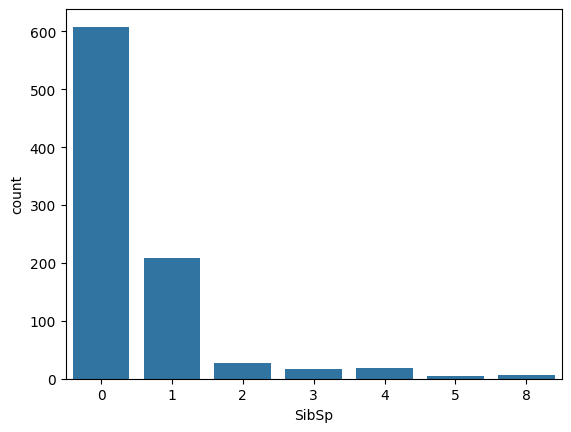

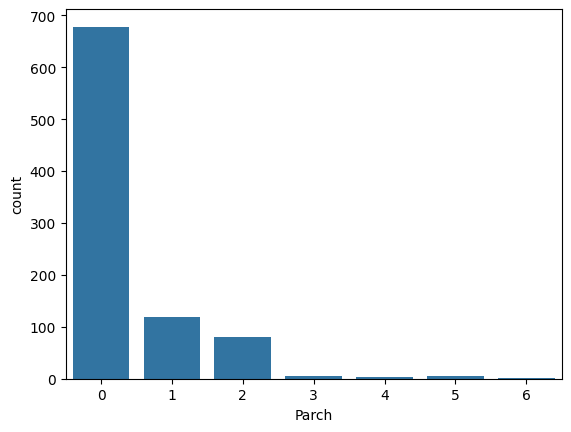

In [ ]:
for col in col_diskrit:
  sns.countplot(x=df[col])
  plt.show()

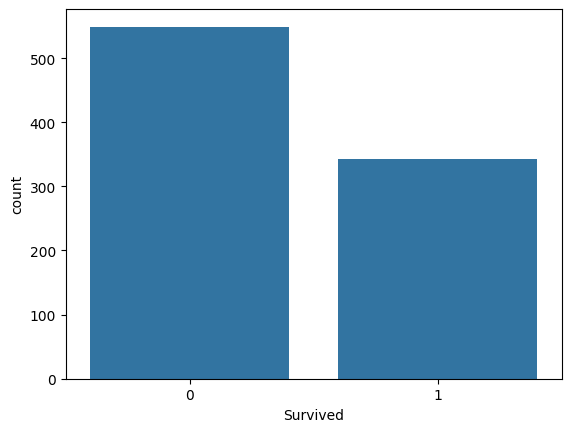

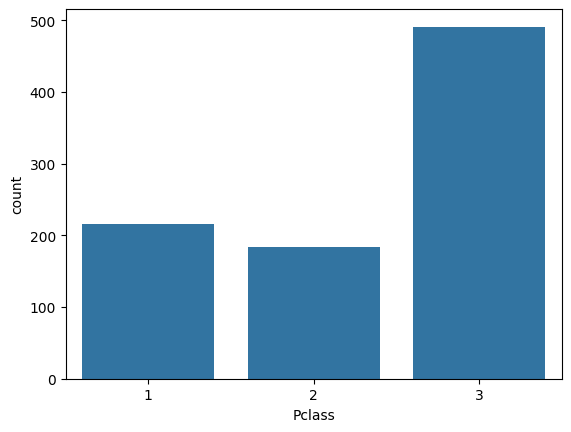

In [ ]:
for col in col_kategorikal:
  sns.countplot(x=df[col])
  plt.show()

#Penanganan Outliers dengan Median

<ipython-input-42-530e5f5ccb99>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Age'].fillna(df_median['Age'].median(), inplace=True)
<ipython-input-42-530e5f5ccb99>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

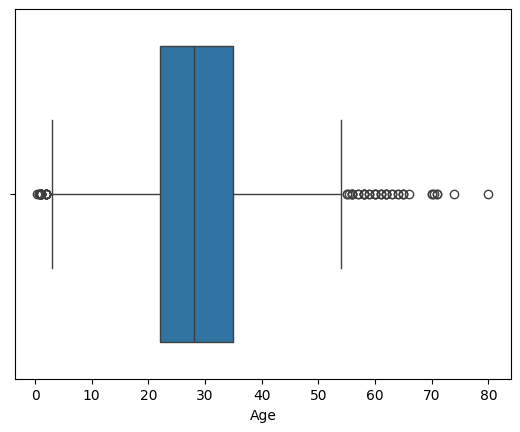

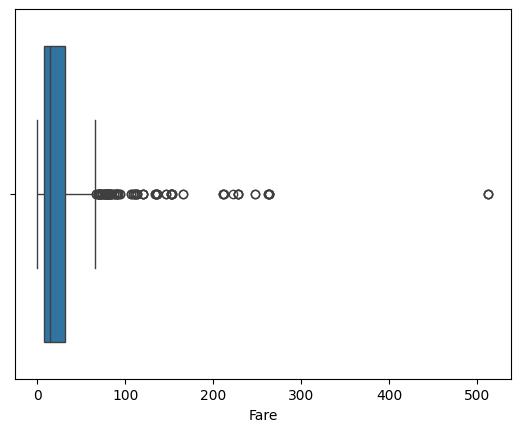

In [ ]:
df_median = df.copy()

# Mengisi nilai yang hilang pada kolom 'age' dengan median
df_median['Age'].fillna(df_median['Age'].median(), inplace=True)

# Mengisi nilai yang hilang pada kolom 'fare' dengan median
df_median['Fare'].fillna(df_median['Fare'].median(), inplace=True)

for col in col_kontinu:
  sns.boxplot(x=df_median[col])
  plt.show()

In [ ]:
def cap_outliers_iqr(data, col):
    """Menerapkan capping pada outlier menggunakan IQR."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

  # Buat salinan untuk menghindari modifikasi langsung pada DataFrame asli
    capped_data = data.copy()

    # Terapkan capping
    capped_data[col] = np.where(capped_data[col] < lower_bound, lower_bound, capped_data[col])
    capped_data[col] = np.where(capped_data[col] > upper_bound, upper_bound, capped_data[col])

    return capped_data

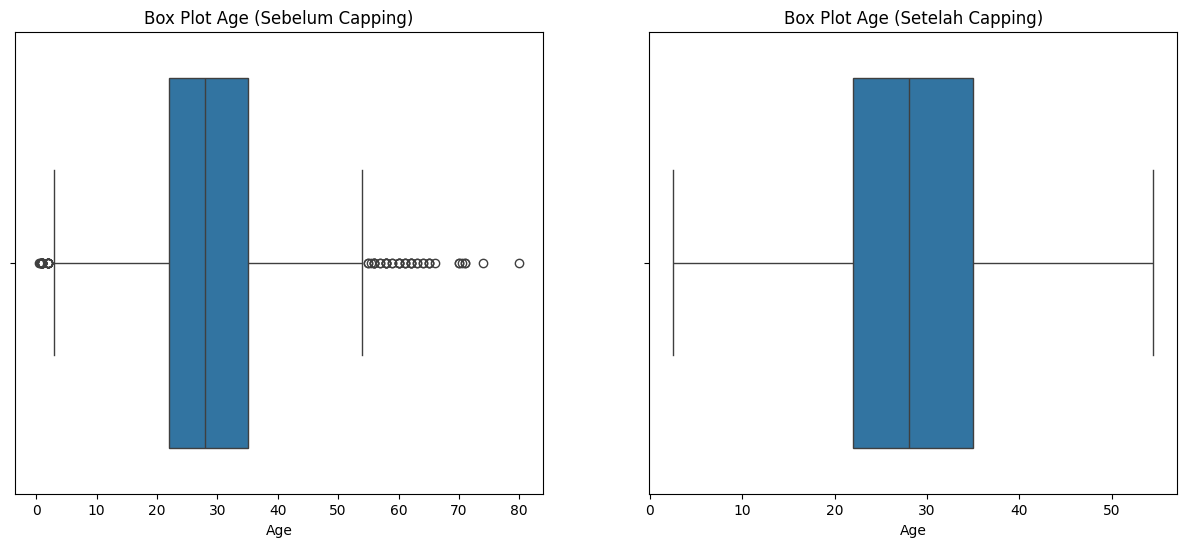

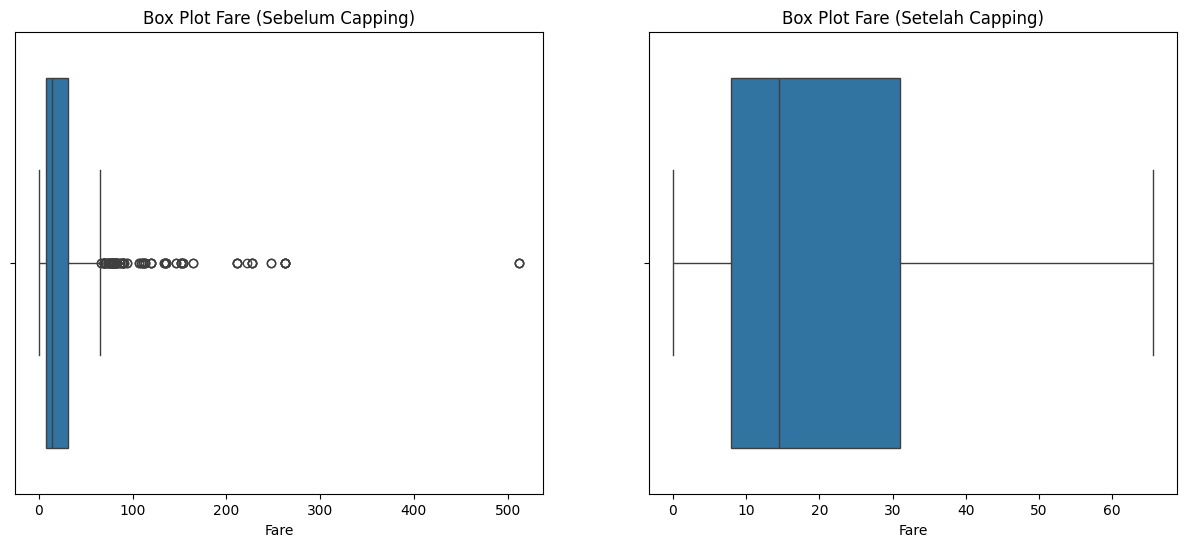

In [ ]:
# Menampilkan box plot sebelum dan sesudah capping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Pastikan numpy diimpor

# Panggil fungsi cap_outliers_iqr untuk membuat df_capped
df_capped = cap_outliers_iqr(df, 'Age')  # Terapkan capping pada kolom 'Age'
df_capped = cap_outliers_iqr(df_capped, 'Fare') # Terapkan capping pada kolom 'Fare'


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Box Plot Age (Sebelum Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['Age'])
plt.title('Box Plot Age (Setelah Capping)')

plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title('Box Plot Fare (Sebelum Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['Fare'])
plt.title('Box Plot Fare (Setelah Capping)')

plt.show()

# Penanganan Outliers dengan Z-score

In [ ]:
import numpy as np

def cap_outliers_zscore(data, col, threshold=3):
    """Menerapkan capping pada outlier menggunakan Z-score."""
    mean = data[col].mean()
    std = data[col].std()

    # Hitung batas atas dan bawah
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

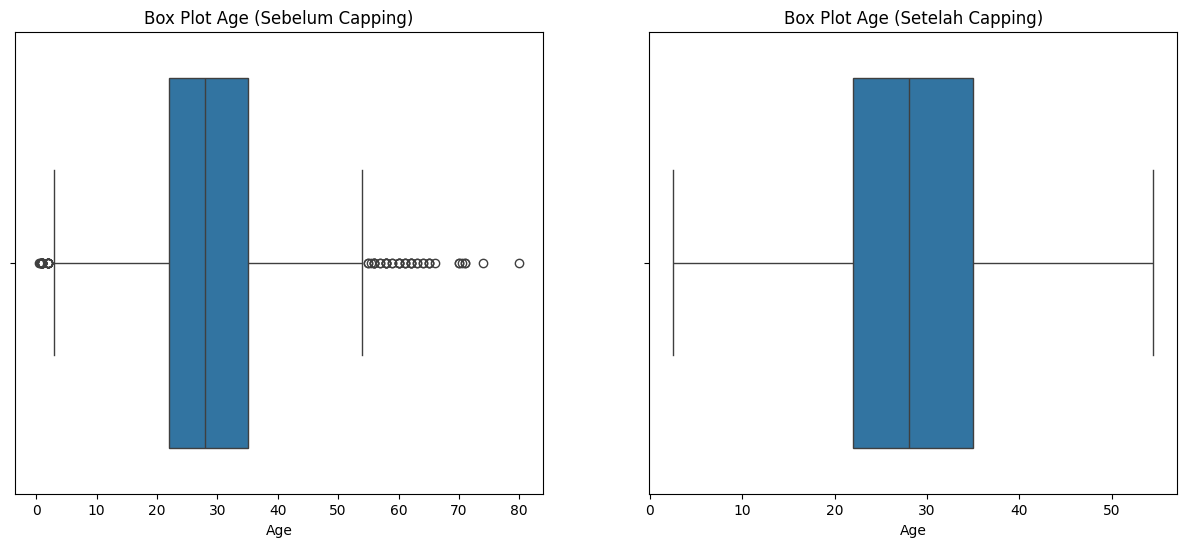

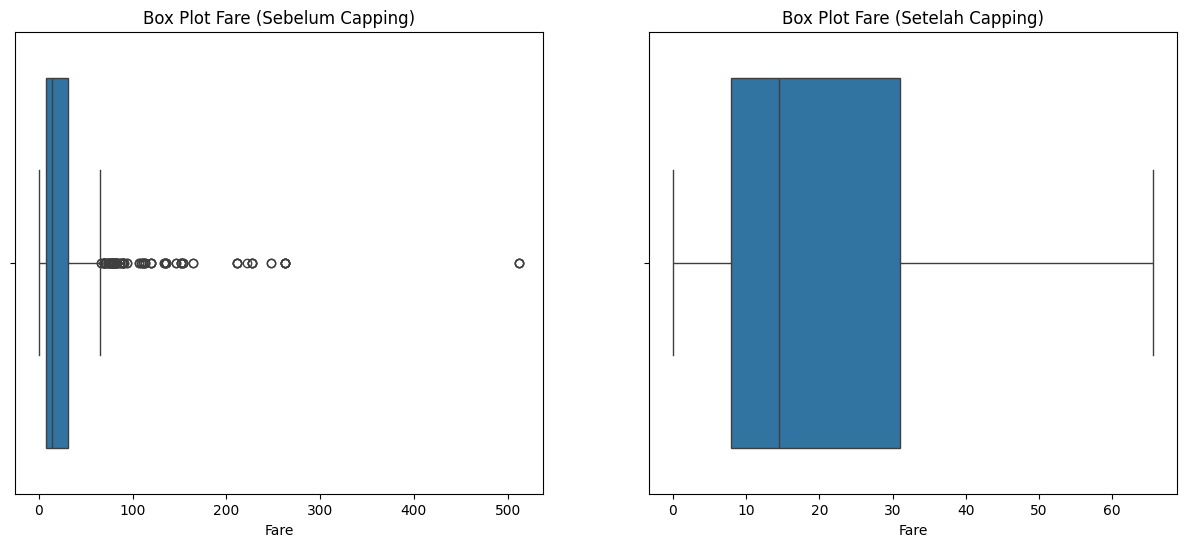

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Box Plot Age (Sebelum Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['Age'])
plt.title('Box Plot Age (Setelah Capping)')

plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title('Box Plot Fare (Sebelum Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['Fare'])
plt.title('Box Plot Fare (Setelah Capping)')

plt.show()